<a href="https://colab.research.google.com/github/leksandre/collaboration-neural-networks/blob/main/cnn_cancer_breast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
from google.colab import files
file = files.upload()


Saving train.csv to train (4).csv


In [ ]:
training_set = pd.read_csv("train.csv", header=0)

In [ ]:
training_set = training_set.dropna() 

In [ ]:
training_set.head(5)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767


In [ ]:
training_set.tail(5)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
25326,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,0,19,1024,1024
25327,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,0,7,1024,1024
25328,ISIC_0073249,-1,male,70.0,lower extremity,MEL,malignant,1,9,1024,1024
25329,ISIC_0073251,-1,female,55.0,palms/soles,NV,benign,0,15,1024,1024
25330,ISIC_0073254,-1,male,50.0,upper extremity,BKL,benign,0,23,1024,1024


In [ ]:
training_set.diagnosis.unique()

array(['NV', 'MEL', 'BKL', 'DF', 'SCC', 'BCC', 'VASC', 'AK'], dtype=object)

In [ ]:
training_set.benign_malignant.unique()

array(['benign', 'malignant'], dtype=object)

In [ ]:
#удаляем колонки котоыре  по  нашему мнению не влияют на результат
training_set.pop('image_name')
#training_set.pop('diagnosis')
training_set.pop('benign_malignant')
training_set.pop('height')
training_set.pop('width')
training_set.pop('patient_id')
#training_set.pop('tfrecord')


0       -1
1       -1
2       -1
3       -1
4       -1
        ..
25326   -1
25327   -1
25328   -1
25329   -1
25330   -1
Name: patient_id, Length: 22480, dtype: int64

In [ ]:
#проверяем
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,female,85.0,head/neck,BCC,0,19
25327,male,65.0,anterior torso,BKL,0,7
25328,male,70.0,lower extremity,MEL,1,9
25329,female,55.0,palms/soles,NV,0,15
25330,male,50.0,upper extremity,BKL,0,23


In [ ]:
training_set.isna().sum() 

sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
target                           0
tfrecord                         0
dtype: int64

In [ ]:
training_set['age_approx'] = training_set['age_approx'].astype (float)
training_set.dtypes

sex                               object
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
target                             int64
tfrecord                           int64
dtype: object

In [ ]:
level_map = { 'female':1,  'male':0}
training_set['sex'] = training_set['sex'].map(level_map)


In [ ]:
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,head/neck,BCC,0,19
25327,0,65.0,anterior torso,BKL,0,7
25328,0,70.0,lower extremity,MEL,1,9
25329,1,55.0,palms/soles,NV,0,15
25330,0,50.0,upper extremity,BKL,0,23


In [ ]:
training_set.dtypes

sex                                int64
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
target                             int64
tfrecord                           int64
dtype: object

In [ ]:
arr1v  =  training_set.anatom_site_general_challenge.unique()

In [ ]:
arr1v

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', 'lateral torso', 'head/neck', 'palms/soles',
       'oral/genital'], dtype=object)

In [ ]:
def Convert(lst):
    res_dct = {lst[i]: i+1  for i in range(0, len(lst)-1, 1)}
    return res_dct
level_map2 =Convert(arr1v)
level_map2

{'anterior torso': 1,
 'upper extremity': 2,
 'posterior torso': 3,
 'lower extremity': 4,
 'lateral torso': 5,
 'head/neck': 6,
 'palms/soles': 7}

In [ ]:
training_set['anatom_site_general_challenge'] = training_set['anatom_site_general_challenge'].map(level_map2)

In [ ]:
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,6.0,BCC,0,19
25327,0,65.0,1.0,BKL,0,7
25328,0,70.0,4.0,MEL,1,9
25329,1,55.0,7.0,NV,0,15
25330,0,50.0,2.0,BKL,0,23


In [ ]:
arr2v  =  training_set.diagnosis.unique()

In [ ]:
level_map3 =Convert(arr2v)
level_map3

{'NV': 1, 'MEL': 2, 'BKL': 3, 'DF': 4, 'SCC': 5, 'BCC': 6, 'VASC': 7}

In [ ]:
training_set['diagnosis'] = training_set['diagnosis'].map(level_map3)

In [ ]:
training_set.age_approx.unique()

array([55., 30., 60., 80., 25., 35., 50., 45., 70., 40., 65., 20., 15.,
       85.,  5., 10., 75.,  0.])

In [ ]:
training_set.dtypes

sex                                int64
age_approx                       float64
anatom_site_general_challenge    float64
diagnosis                        float64
target                             int64
tfrecord                           int64
dtype: object

In [ ]:
#ищем вхождения NaN
training_set.isna().sum() 

sex                                0
age_approx                         0
anatom_site_general_challenge     59
diagnosis                        845
target                             0
tfrecord                           0
dtype: int64

In [ ]:
training_set = training_set.dropna() 

In [ ]:
# training_set['anatom_site_general_challenge'] = training_set['anatom_site_general_challenge'].astype (int)
# training_set['age_approx'] = training_set['age_approx'].astype (int)
# training_set['diagnosis'] = training_set['diagnosis'].astype (int)
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,6.0,6.0,0,19
25327,0,65.0,1.0,3.0,0,7
25328,0,70.0,4.0,2.0,1,9
25329,1,55.0,7.0,1.0,0,15
25330,0,50.0,2.0,3.0,0,23


In [ ]:
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,6.0,6.0,0,19
25327,0,65.0,1.0,3.0,0,7
25328,0,70.0,4.0,2.0,1,9
25329,1,55.0,7.0,1.0,0,15
25330,0,50.0,2.0,3.0,0,23


In [ ]:
training_set.isna().sum() 

sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
target                           0
tfrecord                         0
dtype: int64

In [ ]:
training_set = training_set.dropna() 

In [ ]:
# выдергивам в отдельный датасет колнку с нащим результатом диагноза
target = training_set.pop('target')

In [ ]:
#нормализуем данные

from sklearn import preprocessing

training_set = preprocessing.normalize(training_set)

In [ ]:
training_set

array([[0.01812499, 0.99687422, 0.01812499, 0.01812499, 0.07249994],
       [0.02854813, 0.856444  , 0.02854813, 0.02854813, 0.5138664 ],
       [0.01664587, 0.99875234, 0.03329174, 0.03329174, 0.        ],
       ...,
       [0.        , 0.98985051, 0.05656289, 0.02828144, 0.12726649],
       [0.01740513, 0.95728208, 0.1218359 , 0.01740513, 0.26107693],
       [0.        , 0.90654716, 0.03626189, 0.05439283, 0.41701169]])

In [ ]:
len(training_set)

21576

In [ ]:
len(target)

21576

In [ ]:
target.tail(5)

25326    0
25327    0
25328    1
25329    0
25330    0
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_set, target, test_size=0.2, random_state=1)
lr=1e-4

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers
classifier = Sequential() # Инициализация НС
classifier.add(tf.keras.layers.Flatten(input_dim = 5))
#classifier.add(Dense(units = 32, activation = 'relu', input_dim = 6))#6 - потому что на входе всего 6 чисел
classifier.add(layers.Dense(units = 512, activation = 'relu'))
classifier.add(layers.Dense(units = 256, activation = 'relu'))
classifier.add(layers.Dense(units = 128, activation = 'relu'))
classifier.add(layers.Dropout(0.3))
#classifier.add(layers.BatchNormalization())
classifier.add(layers.Dense(2, activation='softmax'))
classifier.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
#classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
# callbacks = [
#   keras.callbacks.EarlyStopping(min_delta=1e-4, patience=num_epochs_to_wait)
# ]
num_epochs_to_wait = 100
callbacks = [
tf.keras.callbacks.EarlyStopping(monitor='accuracy',  mode="max", patience=num_epochs_to_wait, min_delta=lr, start_from_epoch=100, restore_best_weights=True),
]
classifier.compile(loss='binary_crossentropy',
        optimizer=Adam(learning_rate=lr),
        metrics=['accuracy'])

In [ ]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 500,  callbacks = callbacks)

Epoch 1/500
540/540 [==============================] - 3s 4ms/step - loss: 0.5154 - accuracy: 0.8027
Epoch 2/500
540/540 [==============================] - 3s 5ms/step - loss: 0.5075 - accuracy: 0.8027
Epoch 3/500
540/540 [==============================] - 2s 4ms/step - loss: 0.5039 - accuracy: 0.8027
Epoch 4/500
540/540 [==============================] - 2s 4ms/step - loss: 0.5015 - accuracy: 0.8027
Epoch 5/500
540/540 [==============================] - 2s 4ms/step - loss: 0.4998 - accuracy: 0.8027
Epoch 6/500
540/540 [==============================] - 2s 4ms/step - loss: 0.4987 - accuracy: 0.8027
Epoch 7/500
540/540 [==============================] - 2s 4ms/step - loss: 0.4980 - accuracy: 0.8027
Epoch 8/500
540/540 [==============================] - 2s 4ms/step - loss: 0.4975 - accuracy: 0.8027
Epoch 9/500
540/540 [==============================] - 2s 4ms/step - loss: 0.4972 - accuracy: 0.8027
Epoch 10/500
540/540 [==============================] - 2s 4ms/step - loss: 0.4970 - accura

In [ ]:
history.history['accuracy'].insert(0, 0.1)


In [ ]:
history.history['loss'].insert(0, 1.0)

In [ ]:
history.history

{'loss': [1.0,
  0.5154251456260681,
  0.507468044757843,
  0.5039165616035461,
  0.5014653205871582,
  0.4997991919517517,
  0.49870365858078003,
  0.49797365069389343,
  0.49749764800071716,
  0.4971925914287567,
  0.4969989061355591,
  0.4968775510787964,
  0.4968063235282898,
  0.49676230549812317,
  0.49675053358078003,
  0.494651198387146,
  0.4883612394332886,
  0.48331040143966675,
  0.48008835315704346,
  0.47732892632484436,
  0.4743141233921051,
  0.47065606713294983,
  0.46645769476890564,
  0.45502999424934387,
  0.4295951724052429,
  0.404768705368042,
  0.39022284746170044,
  0.38072308897972107,
  0.3714568018913269,
  0.3640281856060028,
  0.35794797539711,
  0.35128912329673767,
  0.3461613357067108,
  0.3395472764968872,
  0.3337455689907074,
  0.3281443417072296,
  0.3222289979457855,
  0.315630704164505,
  0.31058821082115173,
  0.304455429315567,
  0.29982930421829224,
  0.2941826581954956,
  0.28986525535583496,
  0.2852865159511566,
  0.28077974915504456,
  0.27

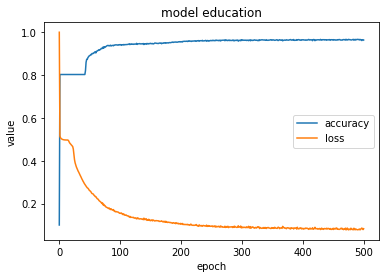

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model education')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [ ]:
Y_pred = classifier.predict(X_test) # подаём на вход обученной НС тестовый набор данных
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]

135/135 [==============================] - 0s 2ms/step


In [ ]:
y_testNum = y_test.to_numpy()

In [ ]:
print(len(X_train),type(X_train),"\n",
len(X_test),type(X_test),"\n",
len(y_train),type(y_train),"\n",
len(y_test),type(y_test),"\n",
len(Y_pred),type(Y_pred),"\n",
len(y_testNum),type(y_testNum))

17260 <class 'numpy.ndarray'> 
 4316 <class 'numpy.ndarray'> 
 17260 <class 'pandas.core.series.Series'> 
 4316 <class 'pandas.core.series.Series'> 
 4316 <class 'list'> 
 4316 <class 'numpy.ndarray'>


In [ ]:
total = 0
correct = 0
wrong = 0
for i in range(len(Y_pred)):
 total=total+1
 if(y_testNum[i] == Y_pred[i]):
  correct=correct+1
 else:
  wrong=wrong+1

print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Total 4316
Correct 4167
Wrong 149


In [ ]:
# from keras import layers
# vgg16net = tf.keras.applications.VGG16(
#   include_top=False,
#   input_shape=(150,150,3),
#   weights='imagenet')

# vgg16net.summary()
# model = tf.keras.models.Sequential([
#   ##tf.keras.Model(inputs=vgg16net.input, outputs=vgg16net.get_layer('block3_pool').output, name="vgg16"),
#   layers.Flatten(input_dim = 6),
#   layers.Dense(512, activation='relu'),
#   layers.Dense(256, activation='relu'),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(1, activation='sigmoid')                        
# ])
# #model.get_layer("vgg16").trainable=False
# model.summary()
     

# model.compile(loss='binary_crossentropy',
#               optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
#               metrics=['accuracy'])

# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20,  restore_best_weights=True),
#              tf.keras.callbacks.ModelCheckpoint('models/vgg_mc_64_3.h5', monitor='val_accuracy', mode='max',
#                                                 save_best_only=True)]
# BATCH_SIZE = 32                                                
# # history = model.fit(
# #       training_set,
# #       epochs=100,
# #       callbacks = callbacks,
# #       shuffle=False,
# #       verbose=1,
# #       validation_data=target,
# #       batch_size=BATCH_SIZE)
# model.fit(X_train, y_train, batch_size = 32, epochs = 100)